### К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
import random

In [5]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        kn = sorted(test_distances)[0:k]
        for l in range(k):
            dist, klas = kn[l]
            classes[klas] += 1/(dist+0.001)
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.833


### Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [10]:
def kmeans(data, k, max_iterations, min_distance):
    classes = {i: [] for i in range(k)}
    
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        old_centroids = centroids.copy()
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        if optimal:
            break
    
    return old_centroids, classes

In [11]:
def avg_squad_distance(centroids, clusters, k):
    sum = 0.0
    for cluster, data in clusters.items():
        distances = np.array([e_metrics(x, centroids[cluster]) for x in data])
        sum += np.sum(distances ** 2)
    return sum/k

In [13]:
X, y = make_blobs(n_samples=100, random_state=1)

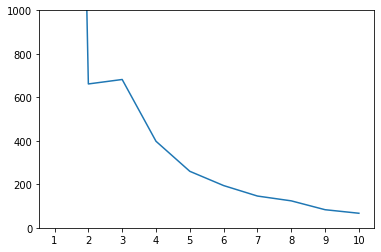

In [14]:
min_distance = 1e-4
max_iterations = 10

avgs = []
for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    avgs.append(avg_squad_distance(centroids, clusters, k))
    
plt.ylim((0,1000))
plt.xticks(list(range(1,11)))
plt.plot(list(range(1,11)), avgs)
plt.show()